In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bootcampviztools as bt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif,SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import os
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay


# 1. Carga datos

In [2]:
#Cargo el dataset

df = pd.read_csv('./beatsdataset_full.csv')

In [3]:
#Echo un primer vistazo
df.head()


,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,85-beats_loudness_band_ratio.mean5,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6,class,id
0,0,0.136402,0.088891,3.201238,0.262813,0.249214,1.114200,0.007004,0.256620,-22.723397,...,0.053618,0.060700,0.361006,0.229552,0.260985,0.145522,0.078291,0.082724,BigRoom,BigRoom001.wav
1,1,0.117053,0.108397,3.194091,0.247679,0.250297,1.065840,0.005388,0.199849,-21.775519,...,0.077255,0.070787,0.345560,0.106581,0.198952,0.095644,0.100741,0.072654,BigRoom,BigRoom002.wav
2,2,0.085314,0.128537,3.123835,0.217220,0.228655,0.789821,0.008251,0.156863,-22.472499,...,0.052989,0.064381,0.250985,0.148319,0.094546,0.085440,0.039289,0.062705,BigRoom,BigRoom003.wav
3,3,0.103046,0.167006,3.151050,0.233638,0.245044,0.967372,0.006569,0.168171,-21.471472,...,0.059995,0.046833,0.316349,0.119784,0.092762,0.110708,0.079089,0.061871,BigRoom,BigRoom004.wav
4,4,0.151702,0.148412,3.194361,0.293711,0.267226,1.352688,0.003874,0.291922,-21.371298,...,0.062124,0.093716,0.316923,0.087055,0.139083,0.095219,0.071245,0.095066,BigRoom,BigRoom005.wav


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           2300 non-null   int64  
 1   1-ZCRm                               2300 non-null   float64
 2   2-Energym                            2300 non-null   float64
 3   3-EnergyEntropym                     2300 non-null   float64
 4   4-SpectralCentroidm                  2300 non-null   float64
 5   5-SpectralSpreadm                    2300 non-null   float64
 6   6-SpectralEntropym                   2300 non-null   float64
 7   7-SpectralFluxm                      2300 non-null   float64
 8   8-SpectralRolloffm                   2300 non-null   float64
 9   9-MFCCs1m                            2300 non-null   float64
 10  10-MFCCs2m                           2300 non-null   float64
 11  11-MFCCs3m                    

In [ ]:
#Elimino las columnas que no me aportan nada

df.drop('id', axis = 1, inplace=True)
df.drop('Unnamed: 0', axis = 1, inplace=True)

# 2. Problema Machine Learning
Me encuentro frente a un problema de aprendizaje supervisado ya que cuento con datos etiquetados por genero. Me encuentro con un dataset con 95 variables y 2300 instancias. 

# 3. Divido en Train y Test

In [80]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train_set.shape

(1840, 93)

In [9]:
test_set.shape

(460, 93)

# 4. Target

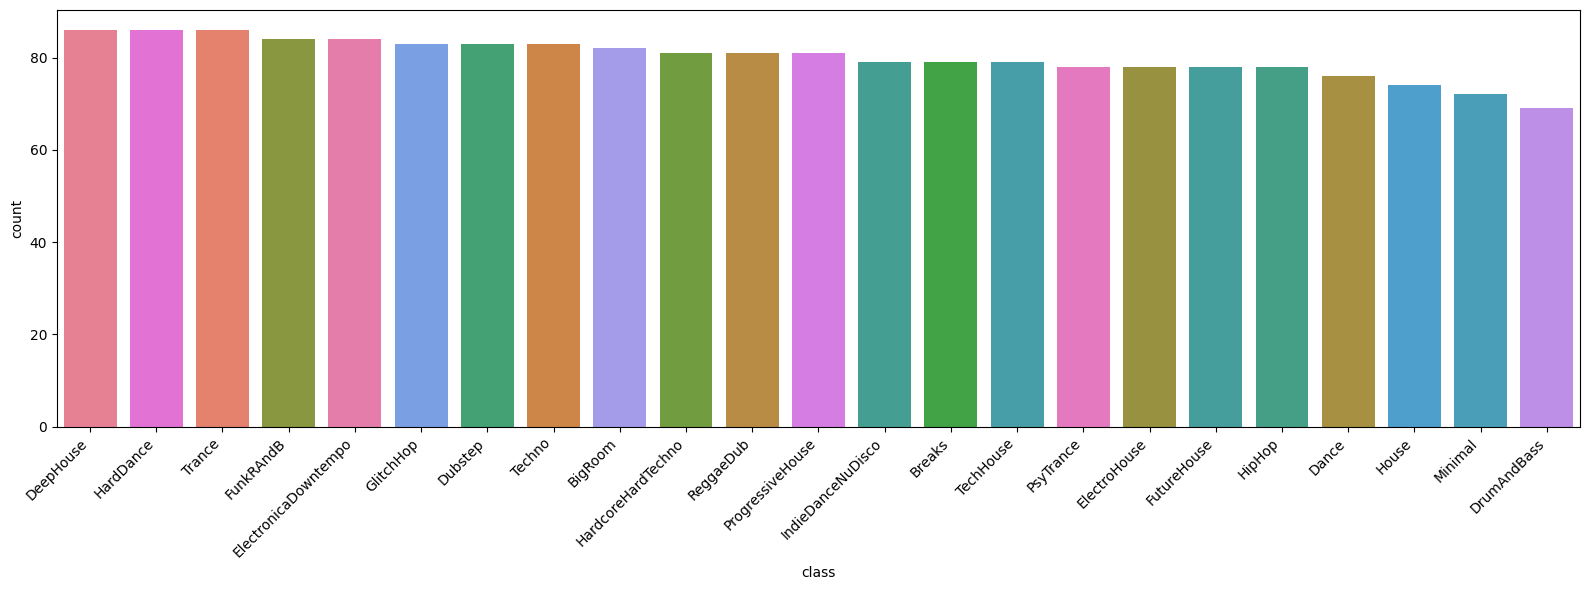

In [ ]:
#Defino el target
target = 'class'

# Analizo el target
plt.figure(figsize=(16, 6))
sns.countplot(data=train_set, x=target, order=train_set[target].value_counts().index, legend = False, hue = target)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Veo que me enfrento a un problema con un target balanceado.

# 5. Comprensión de variables

In [11]:
#Miro de que tipo son los datos que dispongo

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840 entries, 360 to 860
Data columns (total 93 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   1-ZCRm                               1840 non-null   float64
 1   2-Energym                            1840 non-null   float64
 2   3-EnergyEntropym                     1840 non-null   float64
 3   4-SpectralCentroidm                  1840 non-null   float64
 4   5-SpectralSpreadm                    1840 non-null   float64
 5   6-SpectralEntropym                   1840 non-null   float64
 6   7-SpectralFluxm                      1840 non-null   float64
 7   8-SpectralRolloffm                   1840 non-null   float64
 8   9-MFCCs1m                            1840 non-null   float64
 9   10-MFCCs2m                           1840 non-null   float64
 10  11-MFCCs3m                           1840 non-null   float64
 11  12-MFCCs4m                        

Es un dataset con datos numericos, cada columna son features de audio extraidas y analizadas de una muestra aleatoria de 2 minutos sobre cada cancion.

In [12]:
#Fuerzo el tipo de dato del que dispongo para evitar errores posteriores

new_types = {
    float: [col for col in train_set.columns if col != 'class'],
    str: ['class'],
}

for key, value in new_types.items():
    for i in value:
        train_set[i] = train_set[i].astype(key)

#### Reporte de variables
Un pequeño reporte de las columnas, con sus tipos, % de missings y cardinalidad, resultará muy útil a lo largo de la analítica.

In [126]:
feature_report = pd.read_excel('./analisis_variables_audio.xlsx')
feature_report

,Variable,Detalle,Data type,Segmento,Expectativas,Conclusiones
0,1-ZCRm,Zero Crossing Rate (media): cantidad de veces ...,cuantitativa continua,Espectral/Energía,Alta,Probablemente se mantendrá
1,2-Energym,Energy (media): energía total de la señal. Rel...,cuantitativa continua,Espectral/Energía,Alta,Probablemente se mantendrá
2,3-EnergyEntropym,Energy Entropy (media): mide la variabilidad d...,cuantitativa continua,Espectral/Energía,Alta,Probablemente se mantendrá
3,4-SpectralCentroidm,"Centroide espectral (media): indica el ""centro...",cuantitativa continua,Espectral/Energía,Alta,Probablemente se mantendrá
4,5-SpectralSpreadm,Dispersión espectral (media): medida de cuán e...,cuantitativa continua,Espectral/Energía,Alta,Probablemente se mantendrá
...,...,...,...,...,...,...
87,88-beats_loudness_band_ratio.stdev2,Beat loudness 1 a 6 (desvío estándar): Energía...,cuantitativa continua,Banda de Frecuencias / Loudness,Media,Podría mantenerse si no hay alta correlación
88,89-beats_loudness_band_ratio.stdev3,Beat loudness 1 a 6 (desvío estándar): Energía...,cuantitativa continua,Banda de Frecuencias / Loudness,Media,Podría mantenerse si no hay alta correlación
89,90-beats_loudness_band_ratio.stdev4,Beat loudness 1 a 6 (desvío estándar): Energía...,cuantitativa continua,Banda de Frecuencias / Loudness,Media,Podría mantenerse si no hay alta correlación
90,91-beats_loudness_band_ratio.stdev5,Beat loudness 1 a 6 (desvío estándar): Energía...,cuantitativa continua,Banda de Frecuencias / Loudness,Media,Podría mantenerse si no hay alta correlación


De este reporte, obtengo una primera separacion entre las expectativas que tengo de cada variable. Divido en alta, media y bajas o inciertas expectativas de quedarme con esta variable. Describo el tipo de variable, a que se estan refiriendo y detallo por que serian o no importante y que conclusion inicial puedo obtener. Al ser informacion tecnica de un sample de audio, entiendo que varias variables van a ser redundantes, me van a aportar la misma informacion. Incluso ya viendo los nombres y viendo que parecerian indicar caracteristicas similares de la misma cosa, puedo llegar a imaginarme que seran redundantes. Analizare en profundidad su colinealidad.

In [82]:
#### Busco si hay valores nulos o valores 0 en las columnas
for col in train_set.columns:
    nulos = train_set[col].isnull().sum()
    ceros = (train_set[col] == 0).sum() if train_set[col].dtype != 'O' else 0
    if nulos > 0 or ceros > 0:
        print(f"Columna '{col}': {nulos} nulos, {ceros} ceros")

Columna '73-bpm_histogram_first_peak_weight': 0 nulos, 42 ceros
Columna '74-bpm_histogram_second_peak_bpm': 0 nulos, 125 ceros
Columna '75-bpm_histogram_second_peak_spread': 0 nulos, 768 ceros
Columna '76-bpm_histogram_second_peak_weight': 0 nulos, 125 ceros


In [83]:
corr = train_set.corr(numeric_only= True)
corr

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,83-beats_loudness_band_ratio.mean3,84-beats_loudness_band_ratio.mean4,85-beats_loudness_band_ratio.mean5,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6
1-ZCRm,1.000000,0.043805,0.367194,0.913865,0.597555,0.963170,-0.562137,0.978932,0.405071,-0.766145,...,0.126573,0.403291,0.577857,0.588916,0.185873,-0.046771,0.009944,0.247602,0.389370,0.472499
2-Energym,0.043805,1.000000,0.292105,0.207732,0.283396,0.082106,-0.031965,0.048298,0.574817,-0.238990,...,-0.102176,0.025337,0.094773,0.081796,0.001272,-0.015509,-0.064985,0.006214,0.054286,0.047816
3-EnergyEntropym,0.367194,0.292105,1.000000,0.354202,0.199252,0.468805,-0.655513,0.373404,0.696938,-0.471955,...,0.432701,0.502260,0.388647,0.093169,0.125974,0.101754,0.263800,0.313546,0.205310,-0.010166
4-SpectralCentroidm,0.913865,0.207732,0.354202,1.000000,0.838348,0.872814,-0.516040,0.908009,0.430815,-0.736756,...,-0.006193,0.271098,0.484782,0.584753,0.099677,-0.069867,-0.098058,0.130474,0.292962,0.461829
5-SpectralSpreadm,0.597555,0.283396,0.199252,0.838348,1.000000,0.518632,-0.325387,0.585166,0.347873,-0.404586,...,-0.158900,0.012133,0.173047,0.399471,-0.087514,-0.108537,-0.228652,-0.096184,0.014446,0.281071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88-beats_loudness_band_ratio.stdev2,-0.046771,-0.015509,0.101754,-0.069867,-0.108537,-0.066668,-0.077503,-0.043770,-0.021206,0.150216,...,0.229601,-0.004643,-0.073854,-0.109165,0.316947,1.000000,0.307113,0.050798,-0.009490,-0.026736
89-beats_loudness_band_ratio.stdev3,0.009944,-0.064985,0.263800,-0.098058,-0.228652,0.036986,-0.186267,-0.011512,0.073890,-0.044368,...,0.818016,0.390908,0.119792,-0.098280,0.488187,0.307113,1.000000,0.428495,0.152606,-0.020698
90-beats_loudness_band_ratio.stdev4,0.247602,0.006214,0.313546,0.130474,-0.096184,0.324785,-0.261236,0.210445,0.170131,-0.447898,...,0.375157,0.819616,0.408070,0.026925,0.505323,0.050798,0.428495,1.000000,0.481432,0.090734
91-beats_loudness_band_ratio.stdev5,0.389370,0.054286,0.205310,0.292962,0.014446,0.472177,-0.251481,0.362549,0.170456,-0.568196,...,0.111000,0.431233,0.782054,0.141926,0.480781,-0.009490,0.152606,0.481432,1.000000,0.207758


,Var1,Var2,Correlation
3955,71-BPMessentia,72-bpm_histogram_first_peak_bpm,0.992390
6,1-ZCRm,8-SpectralRolloffm,0.978932
4,1-ZCRm,6-SpectralEntropym,0.963170
446,6-SpectralEntropym,8-SpectralRolloffm,0.955753
564,7-SpectralFluxm,41-SpectralFluxstd,0.955521
2537,35-ZCRstd,40-SpectralEntropystd,0.939514
2203,29-ChromaVector8m,63-ChromaVector8std,0.936741
1804,23-ChromaVector2m,57-ChromaVector2std,0.933403
2539,35-ZCRstd,42-SpectralRolloffstd,0.930225
2809,40-SpectralEntropystd,42-SpectralRolloffstd,0.924910


<Axes: >

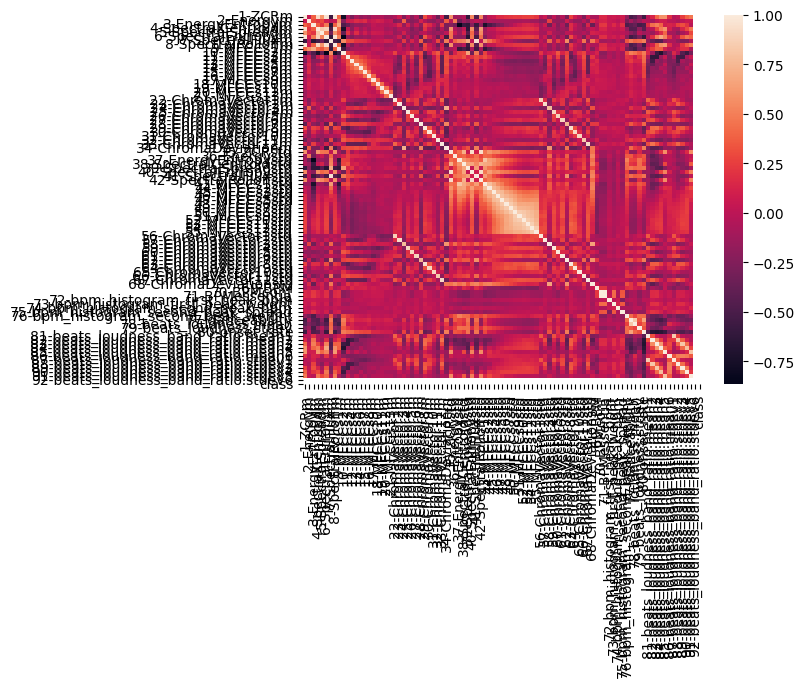

In [92]:
sns.heatmap(X.corr(),
                xticklabels=train_set.columns,
                yticklabels=train_set.columns)

Contexto de negocio para estas columnas:
Estas columnas son  derivadas de un análisis de histograma del tempo (BPM). Usualmente, en audio: el primer pico se refiere al BPM más probable.
El segundo pico representa un BPM alternativo, si existe.
Esto sugiere que cuando el segundo pico no existe (no se detecta otro BPM relevante), es esperado que second_peak_bpm, second_peak_weight, etc. sean 0.
Así que no son valores faltantes, sino ausencia legítima de una segunda modalidad en el histograma. Justo estas columnas son las columnas que apriori estan etiquetadas con una baja expectativa de mantenerlas.

In [20]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
1-ZCRm,1840.0,0.108156,0.037041,0.019630,0.081342,0.107797,0.133357,0.246655
2-Energym,1840.0,0.103110,0.040310,0.004948,0.074501,0.099288,0.127393,0.274944
3-EnergyEntropym,1840.0,3.111620,0.069601,2.809542,3.066686,3.117736,3.163688,3.254197
4-SpectralCentroidm,1840.0,0.235859,0.043519,0.082676,0.206872,0.237509,0.268193,0.373752
5-SpectralSpreadm,1840.0,0.241381,0.019487,0.154010,0.229887,0.243002,0.255103,0.300672
...,...,...,...,...,...,...,...,...
88-beats_loudness_band_ratio.stdev2,1840.0,0.129142,0.064690,0.007370,0.082810,0.119993,0.166114,0.390884
89-beats_loudness_band_ratio.stdev3,1840.0,0.119525,0.054550,0.001096,0.080480,0.117847,0.155128,0.357755
90-beats_loudness_band_ratio.stdev4,1840.0,0.102607,0.047832,0.001714,0.070244,0.099492,0.132069,0.340630
91-beats_loudness_band_ratio.stdev5,1840.0,0.071669,0.035795,0.000081,0.046341,0.068935,0.093911,0.246099


Teniendo el conocimiento de negocio, sé que las variables que impliquen el BPM (Beats per minute) de la canción, va a ser super importante como variable. Veo que hay varias columnas que empiezan por BPM asique decido analizarlas

In [21]:
train_set

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,84-beats_loudness_band_ratio.mean4,85-beats_loudness_band_ratio.mean5,86-beats_loudness_band_ratio.mean6,87-beats_loudness_band_ratio.stdev1,88-beats_loudness_band_ratio.stdev2,89-beats_loudness_band_ratio.stdev3,90-beats_loudness_band_ratio.stdev4,91-beats_loudness_band_ratio.stdev5,92-beats_loudness_band_ratio.stdev6,class
360,0.050940,0.051625,3.001282,0.155016,0.211618,0.350697,0.016367,0.080452,-24.631295,2.683255,...,0.028920,0.007077,0.022507,0.368509,0.199828,0.210104,0.058222,0.015998,0.055783,DeepHouse
2224,0.158846,0.049273,3.214730,0.273034,0.242197,1.503129,0.004298,0.341806,-22.402477,1.161573,...,0.147613,0.105827,0.129238,0.235134,0.132800,0.124311,0.102597,0.067226,0.093885,Trance
351,0.049800,0.102451,3.121658,0.145398,0.204132,0.309297,0.014065,0.070770,-23.304874,2.835648,...,0.041087,0.036982,0.016359,0.334324,0.170895,0.143985,0.066764,0.071168,0.034738,DeepHouse
2147,0.151109,0.029422,3.123021,0.279404,0.265365,1.311999,0.006892,0.282440,-25.687048,1.873075,...,0.079602,0.080513,0.252431,0.287890,0.159940,0.176238,0.092193,0.069068,0.292456,Techno
1962,0.092946,0.020892,2.915566,0.209340,0.242208,0.561404,0.009122,0.116148,-25.341219,2.559906,...,0.032582,0.011160,0.037107,0.237473,0.203783,0.099895,0.046642,0.012063,0.031524,ReggaeDub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.055982,0.130105,3.010088,0.185506,0.232425,0.413334,0.033781,0.097743,-24.049135,2.369110,...,0.020285,0.016937,0.018714,0.294059,0.283478,0.068668,0.070466,0.031240,0.037746,Minimal
1095,0.082368,0.072419,2.981374,0.211343,0.243264,0.644980,0.014408,0.138365,-24.053667,1.841137,...,0.021832,0.022132,0.034707,0.260973,0.208414,0.085867,0.033967,0.039912,0.049600,GlitchHop
1130,0.069160,0.153967,3.155439,0.202466,0.236980,0.641711,0.011866,0.125489,-21.914408,1.864108,...,0.083094,0.040751,0.051826,0.325563,0.119197,0.142053,0.091178,0.073708,0.064674,HardcoreHardTechno
1294,0.127987,0.086328,3.177360,0.248070,0.243246,1.072215,0.005084,0.223648,-22.480114,1.560979,...,0.143636,0.065347,0.085456,0.237199,0.196935,0.167835,0.117743,0.071072,0.092937,HardDance


In [22]:
bpm_columns = [col for col in train_set.columns if 'BPM' in col]
train_set_bpm = train_set[bpm_columns]
train_set_bpm.head()

,69-BPM,70-BPMconf,71-BPMessentia
360,120.000000,0.129406,113.951950
2224,133.333333,0.132121,137.929352
351,120.000000,0.153386,120.025864
2147,120.000000,0.139389,123.590790
1962,133.333333,0.165955,133.080673


In [23]:
train_set_bpm['69-BPM'].value_counts()

69-BPM
120.000000    658
133.333333    494
150.000000    189
171.428571    159
240.000000    116
200.000000     99
109.090909     53
300.000000     41
100.000000     12
400.000000      7
92.307692       4
600.000000      3
85.714286       3
63.157895       1
80.000000       1
Name: count, dtype: int64

In [24]:
train_set_bpm['70-BPMconf'].value_counts()

70-BPMconf
0.113648    3
0.168038    2
0.293719    2
0.200000    2
0.103385    2
           ..
0.114948    1
0.192281    1
0.161808    1
0.119306    1
0.149327    1
Name: count, Length: 1830, dtype: int64

In [25]:
train_set_bpm['71-BPMessentia'].value_counts()

71-BPMessentia
172.265961    5
172.265839    4
128.020706    3
128.096390    2
123.981453    2
             ..
125.933182    1
128.093826    1
139.801910    1
128.238403    1
111.970833    1
Name: count, Length: 1806, dtype: int64

Luego de revisar los valores para cada variable, me doy cuenta de que los valores de '69-BPM' no me hacen sentido, conociendo el negocio. Esta columna me doy cuenta de que tiene valores muy discretos y repetidos, y valores extremos como 300, 400 o 600. No parecen mediciones exactas sino valores normalizados o redondeados automaticamente. Y luego al analizar los valores de la columna '71-BPMessentia' me doy cuenta de que esta es la que contiene la informacion real, medida por Essentia, una librería especializada en análisis de audio. Entonces decido utilizar la feature '71-BPMessentia' como mi variable principal de tempo y elimino la variable '69-BPM' que se a ciencia exacta que no colabora con mi modelo. '70-BPMconf' no se que me muestra sinceramente, veremos con los analisis posteriores si es relevante o no

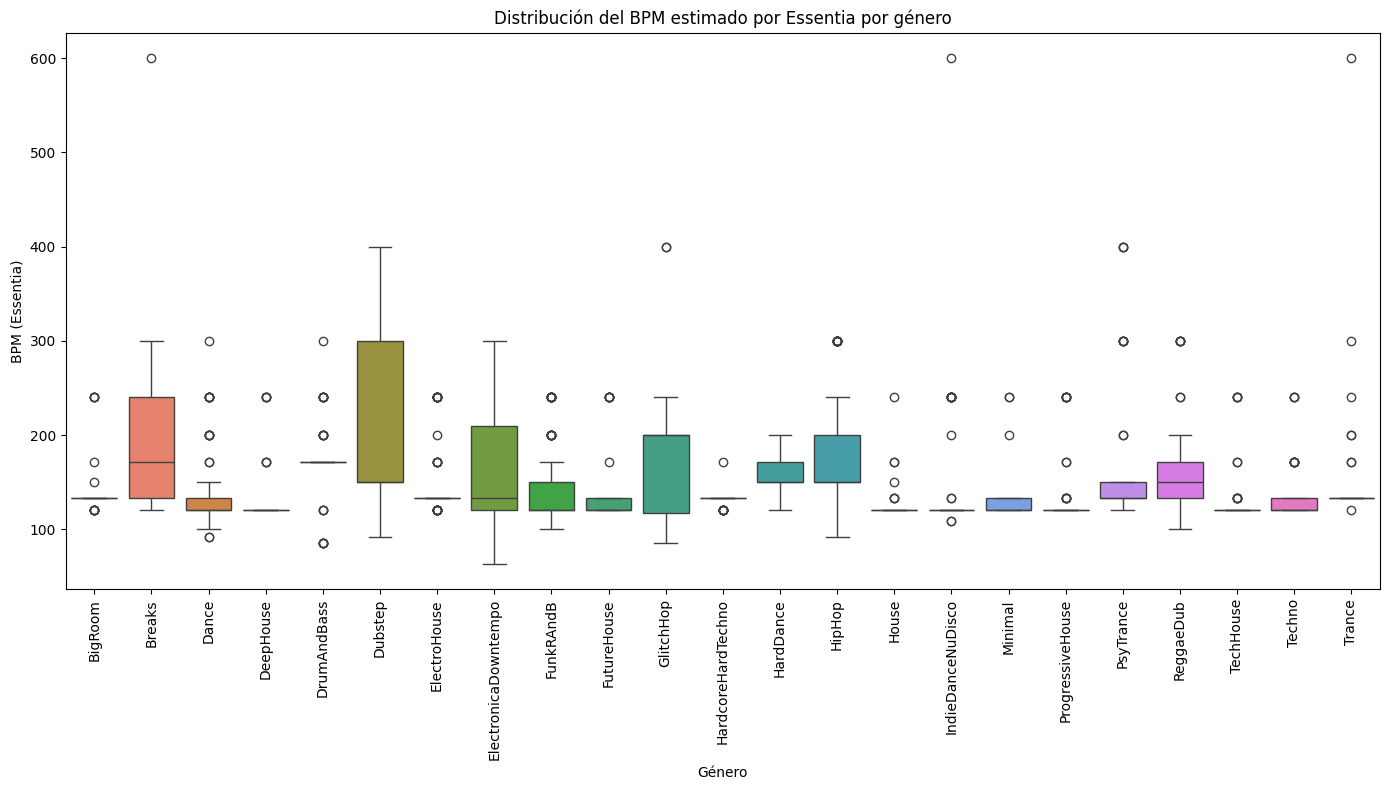

In [35]:
# Crear un boxplot de '71-BPMessentia' por género musical
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='class', y='69-BPM', hue=target)
plt.xticks(rotation=90)
plt.title('Distribución del BPM estimado por Essentia por género')
plt.ylabel('BPM (Essentia)')
plt.xlabel('Género')
plt.tight_layout()
plt.show()

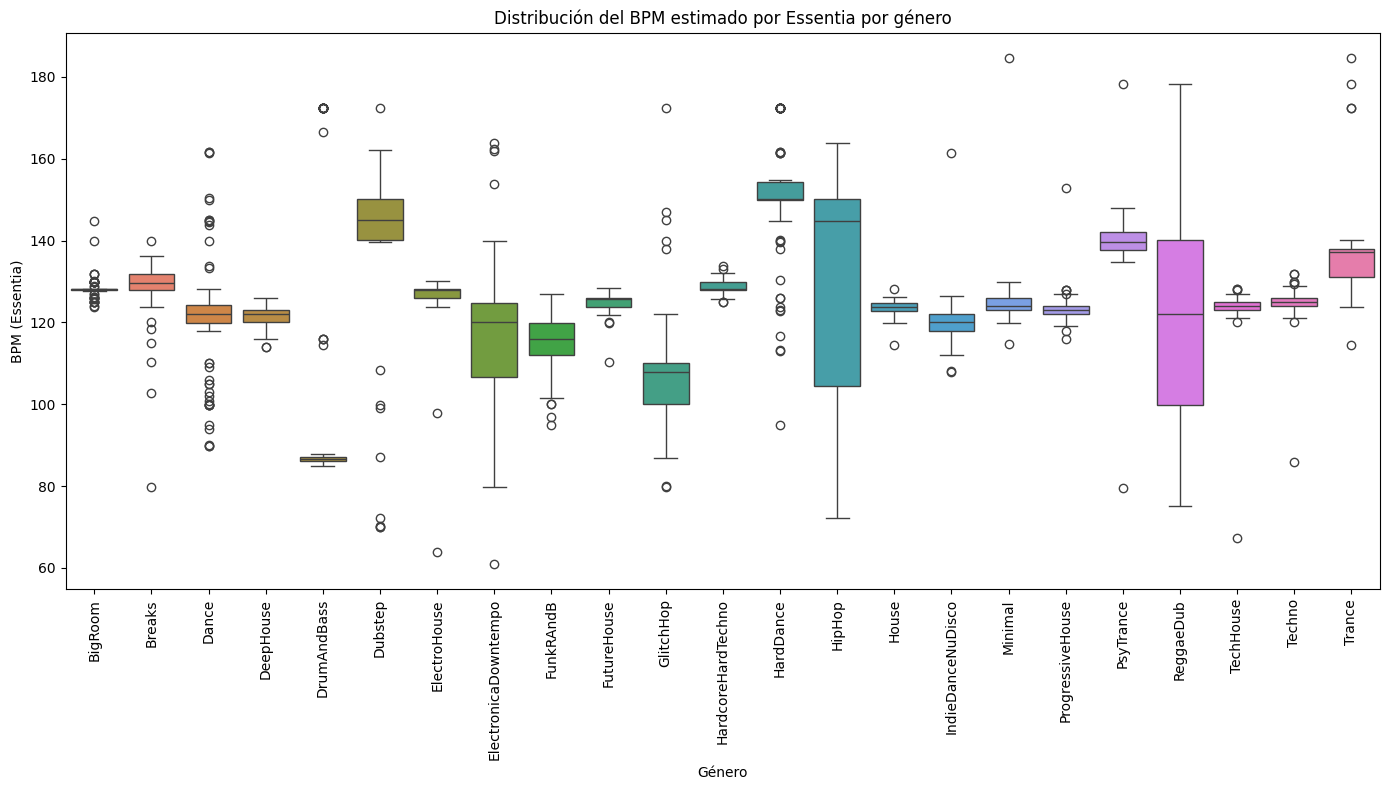

In [34]:
# Crear un boxplot de '71-BPMessentia' por género musical
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='class', y='71-BPMessentia', hue=target)
plt.xticks(rotation=90)
plt.title('Distribución del BPM estimado por Essentia por género')
plt.ylabel('BPM (Essentia)')
plt.xlabel('Género')
plt.tight_layout()
plt.show()

Graficamente puedo observar tambien una discriminacion por genero que me hace mas sentido en la variable '71-BPMessentia'

Al tener varias features, voy a aplicar los metodos de seleccion de features para reducir la dimensionalidad del mismo, sin perder informacion valiosa y quedandome solo con lo mas importante. Utilizare metodos que acepten un target categorico y sean especificos de problemas de clasificacion.

In [26]:

# Variables independientes y target
X = train_set.drop(columns=['class', '69-BPM'], errors='ignore')
y = train_set['class']

# Codificamos el target con LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Aplicamos SelectKBest con f_classif
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X, y_encoded)
scores_f = selector_f.scores_

# Aplicamos SelectKBest con mutual_info_classif
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X, y_encoded)
scores_mi = selector_mi.scores_

# Crear un DataFrame con los resultados
feature_scores = pd.DataFrame({
    'Variable': X.columns,
    'F_score (ANOVA)': scores_f,
    'Mutual_info': scores_mi
}).sort_values(by='F_score (ANOVA)', ascending=False)

Aplico un test de ANOVA. El F-score de ANOVA mide cuánto varía la media de una variable numérica entre diferentes clases.
Un valor alto significa que la media de esa variable cambia mucho entre géneros musicales. Cuanto más alto el F-score, más poder discriminativo tiene esa variable para distinguir géneros.
A su vez, aplico un Mutual Information, utilizando mutual_info_classif de sklear que está específicamente diseñada para problemas de clasificación y puede manejar features numéricas continuas y un target categórico. Cuanto mayor es el valor de MI, más dependencia (de cualquier tipo) hay entre la variable y la clase.

In [ ]:
9

,Variable,F_score (ANOVA),Mutual_info
38,39-SpectralSpreadstd,74.219740,0.366919
70,72-bpm_histogram_first_peak_bpm,64.241533,1.085558
69,71-BPMessentia,61.600577,1.168164
9,10-MFCCs2m,61.439173,0.302817
6,7-SpectralFluxm,60.448297,0.343727
...,...,...,...
15,16-MFCCs8m,2.865097,0.054223
16,17-MFCCs9m,2.596520,0.031514
17,18-MFCCs10m,2.559038,0.007444
18,19-MFCCs11m,1.938467,0.030259


In [98]:
feature_scores[(feature_scores['Mutual_info'] > 0.2) & (feature_scores['F_score (ANOVA)'] > 50) ]

,Variable,F_score (ANOVA),Mutual_info
38,39-SpectralSpreadstd,74.219740,0.366919
70,72-bpm_histogram_first_peak_bpm,64.241533,1.085558
69,71-BPMessentia,61.600577,1.168164
9,10-MFCCs2m,61.439173,0.302817
6,7-SpectralFluxm,60.448297,0.343727
8,9-MFCCs1m,59.128862,0.316627
2,3-EnergyEntropym,58.672028,0.312628
37,38-SpectralCentroidstd,54.374406,0.319597
53,54-MFCCs12std,52.273620,0.260848
51,52-MFCCs10std,51.684227,0.308456


In [101]:
selected_variables = feature_scores.loc[
    (feature_scores['Mutual_info'] > 0.2) & (feature_scores['F_score (ANOVA)'] > 50),
    'Variable'
].tolist()
selected_variables

['39-SpectralSpreadstd',
 '72-bpm_histogram_first_peak_bpm',
 '71-BPMessentia',
 '10-MFCCs2m',
 '7-SpectralFluxm',
 '9-MFCCs1m',
 '3-EnergyEntropym',
 '38-SpectralCentroidstd',
 '54-MFCCs12std',
 '52-MFCCs10std']

Selecciono las 30 primeras features en base a cada modelo y me guardo las listas

In [56]:
features_mutual = feature_scores[feature_scores['Mutual_info'] > 0.2].sort_values(by='Mutual_info', ascending=False).head(30)['Variable'].to_list()
features_mutual

['71-BPMessentia',
 '72-bpm_histogram_first_peak_bpm',
 '76-bpm_histogram_second_peak_weight',
 '74-bpm_histogram_second_peak_bpm',
 '39-SpectralSpreadstd',
 '7-SpectralFluxm',
 '38-SpectralCentroidstd',
 '51-MFCCs9std',
 '9-MFCCs1m',
 '3-EnergyEntropym',
 '52-MFCCs10std',
 '10-MFCCs2m',
 '53-MFCCs11std',
 '55-MFCCs13std',
 '77-danceability',
 '50-MFCCs8std',
 '85-beats_loudness_band_ratio.mean5',
 '6-SpectralEntropym',
 '41-SpectralFluxstd',
 '70-BPMconf',
 '44-MFCCs2std',
 '78-beats_loudness.mean',
 '47-MFCCs5std',
 '54-MFCCs12std',
 '48-MFCCs6std',
 '2-Energym',
 '43-MFCCs1std',
 '45-MFCCs3std',
 '49-MFCCs7std',
 '46-MFCCs4std']

In [54]:
features_anova = feature_scores[feature_scores['F_score (ANOVA)'] > 30].head(30)['Variable'].tolist()
features_anova

['39-SpectralSpreadstd',
 '72-bpm_histogram_first_peak_bpm',
 '71-BPMessentia',
 '10-MFCCs2m',
 '7-SpectralFluxm',
 '9-MFCCs1m',
 '3-EnergyEntropym',
 '38-SpectralCentroidstd',
 '54-MFCCs12std',
 '52-MFCCs10std',
 '50-MFCCs8std',
 '55-MFCCs13std',
 '48-MFCCs6std',
 '53-MFCCs11std',
 '70-BPMconf',
 '6-SpectralEntropym',
 '77-danceability',
 '51-MFCCs9std',
 '4-SpectralCentroidm',
 '41-SpectralFluxstd',
 '49-MFCCs7std',
 '37-EnergyEntropystd',
 '43-MFCCs1std',
 '47-MFCCs5std',
 '2-Energym',
 '80-onset_rate',
 '45-MFCCs3std',
 '1-ZCRm',
 '44-MFCCs2std',
 '78-beats_loudness.mean']

In [42]:
# Dividir en train/test para entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Entrenar RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia de las features
importances = rf.feature_importances_

# Crear DataFrame con resultados
rf_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [122]:
X_train.shape

(1840, 10)

In [124]:
y_train.shape

(1472,)

In [76]:
rf_selector = RandomForestClassifier(random_state= 42) #

selector_modelo = SelectFromModel(estimator = rf_selector, threshold="median") # Nos quedamos con la mitad

selector_modelo.fit(X_train, y_train) # X_train e y_train en los argumentos

# 2. Obtener el boolean mask de features seleccionadas
mask = selector_modelo.get_support()

# 3. Obtener nombres e importancias de esas features
selected_features = X_train.columns[mask]
importances = selector_modelo.estimator_.feature_importances_[mask]

# 4. Ordenar por importancia
feature_importance_ordered = sorted(zip(selected_features, importances), key=lambda x: x[1], reverse=True)

# 5. Obtener solo los nombres en orden
features_modelo = [name for name, _ in feature_importance_ordered]

# Mostrar resultado
features_modelo

['71-BPMessentia',
 '72-bpm_histogram_first_peak_bpm',
 '70-BPMconf',
 '39-SpectralSpreadstd',
 '2-Energym',
 '44-MFCCs2std',
 '48-MFCCs6std',
 '38-SpectralCentroidstd',
 '7-SpectralFluxm',
 '9-MFCCs1m',
 '43-MFCCs1std',
 '54-MFCCs12std',
 '52-MFCCs10std',
 '77-danceability',
 '80-onset_rate',
 '41-SpectralFluxstd',
 '3-EnergyEntropym',
 '51-MFCCs9std',
 '55-MFCCs13std',
 '79-beats_loudness.stdev',
 '50-MFCCs8std',
 '88-beats_loudness_band_ratio.stdev2',
 '10-MFCCs2m',
 '74-bpm_histogram_second_peak_bpm',
 '78-beats_loudness.mean',
 '45-MFCCs3std',
 '47-MFCCs5std',
 '49-MFCCs7std',
 '53-MFCCs11std',
 '46-MFCCs4std',
 '85-beats_loudness_band_ratio.mean5',
 '83-beats_loudness_band_ratio.mean3',
 '4-SpectralCentroidm',
 '86-beats_loudness_band_ratio.mean6',
 '34-ChromaDeviationm',
 '40-SpectralEntropystd',
 '37-EnergyEntropystd',
 '82-beats_loudness_band_ratio.mean2',
 '35-ZCRstd',
 '42-SpectralRolloffstd',
 '5-SpectralSpreadm',
 '11-MFCCs3m',
 '24-ChromaVector3m',
 '76-bpm_histogram_seco

In [99]:

# Convertir a long-form y eliminar duplicados
corr_matrix = train_set.corr(numeric_only=True)
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # solo triángulo superior
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

# Filtrar correlaciones fuertes (positivas o negativas)
high_corr = corr_pairs[abs(corr_pairs['Correlation']) > 0.8].sort_values(by='Correlation', ascending=False)

high_corr

,Var1,Var2,Correlation
3955,71-BPMessentia,72-bpm_histogram_first_peak_bpm,0.992390
6,1-ZCRm,8-SpectralRolloffm,0.978932
4,1-ZCRm,6-SpectralEntropym,0.963170
446,6-SpectralEntropym,8-SpectralRolloffm,0.955753
564,7-SpectralFluxm,41-SpectralFluxstd,0.955521
2537,35-ZCRstd,40-SpectralEntropystd,0.939514
2203,29-ChromaVector8m,63-ChromaVector8std,0.936741
1804,23-ChromaVector2m,57-ChromaVector2std,0.933403
2539,35-ZCRstd,42-SpectralRolloffstd,0.930225
2809,40-SpectralEntropystd,42-SpectralRolloffstd,0.924910


In [94]:
features_modelo

pares_correlados = [
    ('71-BPMessentia', '72-bpm_histogram_first_peak_bpm'),
    ('7-SpectralFluxm', '41-SpectralFluxstd'),
    ('40-SpectralEntropystd', '35-ZCRstd'),
    ('35-ZCRstd', '42-SpectralRolloffstd'),
    ('40-SpectralEntropystd', '42-SpectralRolloffstd'),
    ('4-SpectralCentroidm', '6-SpectralEntropym'),
    ('54-MFCCs12std', '53-MFCCs11std'),
    ('52-MFCCs10std', '51-MFCCs9std'),
    ('52-MFCCs10std', '53-MFCCs11std'),
    ('54-MFCCs12std', '55-MFCCs13std'),
    ('88-beats_loudness_band_ratio.stdev2', '82-beats_loudness_band_ratio.mean2'),
    ('51-MFCCs9std', '50-MFCCs8std'),
    ('50-MFCCs8std', '49-MFCCs7std'),
    ('4-SpectralCentroidm', '5-SpectralSpreadm'),
    ('48-MFCCs6std', '49-MFCCs7std'),
    ('79-beats_loudness.stdev', '78-beats_loudness.mean'),
    ('48-MFCCs6std', '47-MFCCs5std'),
    ('52-MFCCs10std', '50-MFCCs8std'),
    ('43-MFCCs1std', '37-EnergyEntropystd'),
    ('54-MFCCs12std', '52-MFCCs10std'),
    ('3-EnergyEntropym', '37-EnergyEntropystd'),
    ('10-MFCCs2m', '6-SpectralEntropym'),
]

# Usamos un conjunto para mantener las mejores
features_a_mantener = set(features_modelo)

for f1, f2 in pares_correlados:
    if f1 in features_modelo and f2 in features_modelo:
        # Mantener el más importante (más arriba en la lista)
        if features_modelo.index(f1) < features_modelo.index(f2):
            features_a_mantener.discard(f2)
        else:
            features_a_mantener.discard(f1)

# Convertir a lista ordenada por importancia original
final_features = [f for f in features_modelo if f in features_a_mantener]


In [95]:
final_features

['71-BPMessentia',
 '70-BPMconf',
 '39-SpectralSpreadstd',
 '2-Energym',
 '44-MFCCs2std',
 '48-MFCCs6std',
 '38-SpectralCentroidstd',
 '7-SpectralFluxm',
 '9-MFCCs1m',
 '43-MFCCs1std',
 '54-MFCCs12std',
 '77-danceability',
 '80-onset_rate',
 '3-EnergyEntropym',
 '79-beats_loudness.stdev',
 '88-beats_loudness_band_ratio.stdev2',
 '10-MFCCs2m',
 '74-bpm_histogram_second_peak_bpm',
 '45-MFCCs3std',
 '46-MFCCs4std',
 '85-beats_loudness_band_ratio.mean5',
 '83-beats_loudness_band_ratio.mean3',
 '4-SpectralCentroidm',
 '86-beats_loudness_band_ratio.mean6',
 '34-ChromaDeviationm',
 '40-SpectralEntropystd',
 '11-MFCCs3m',
 '24-ChromaVector3m',
 '76-bpm_histogram_second_peak_weight',
 '73-bpm_histogram_first_peak_weight']

In [96]:
len(final_features)

30

# 7. Análisis univariante

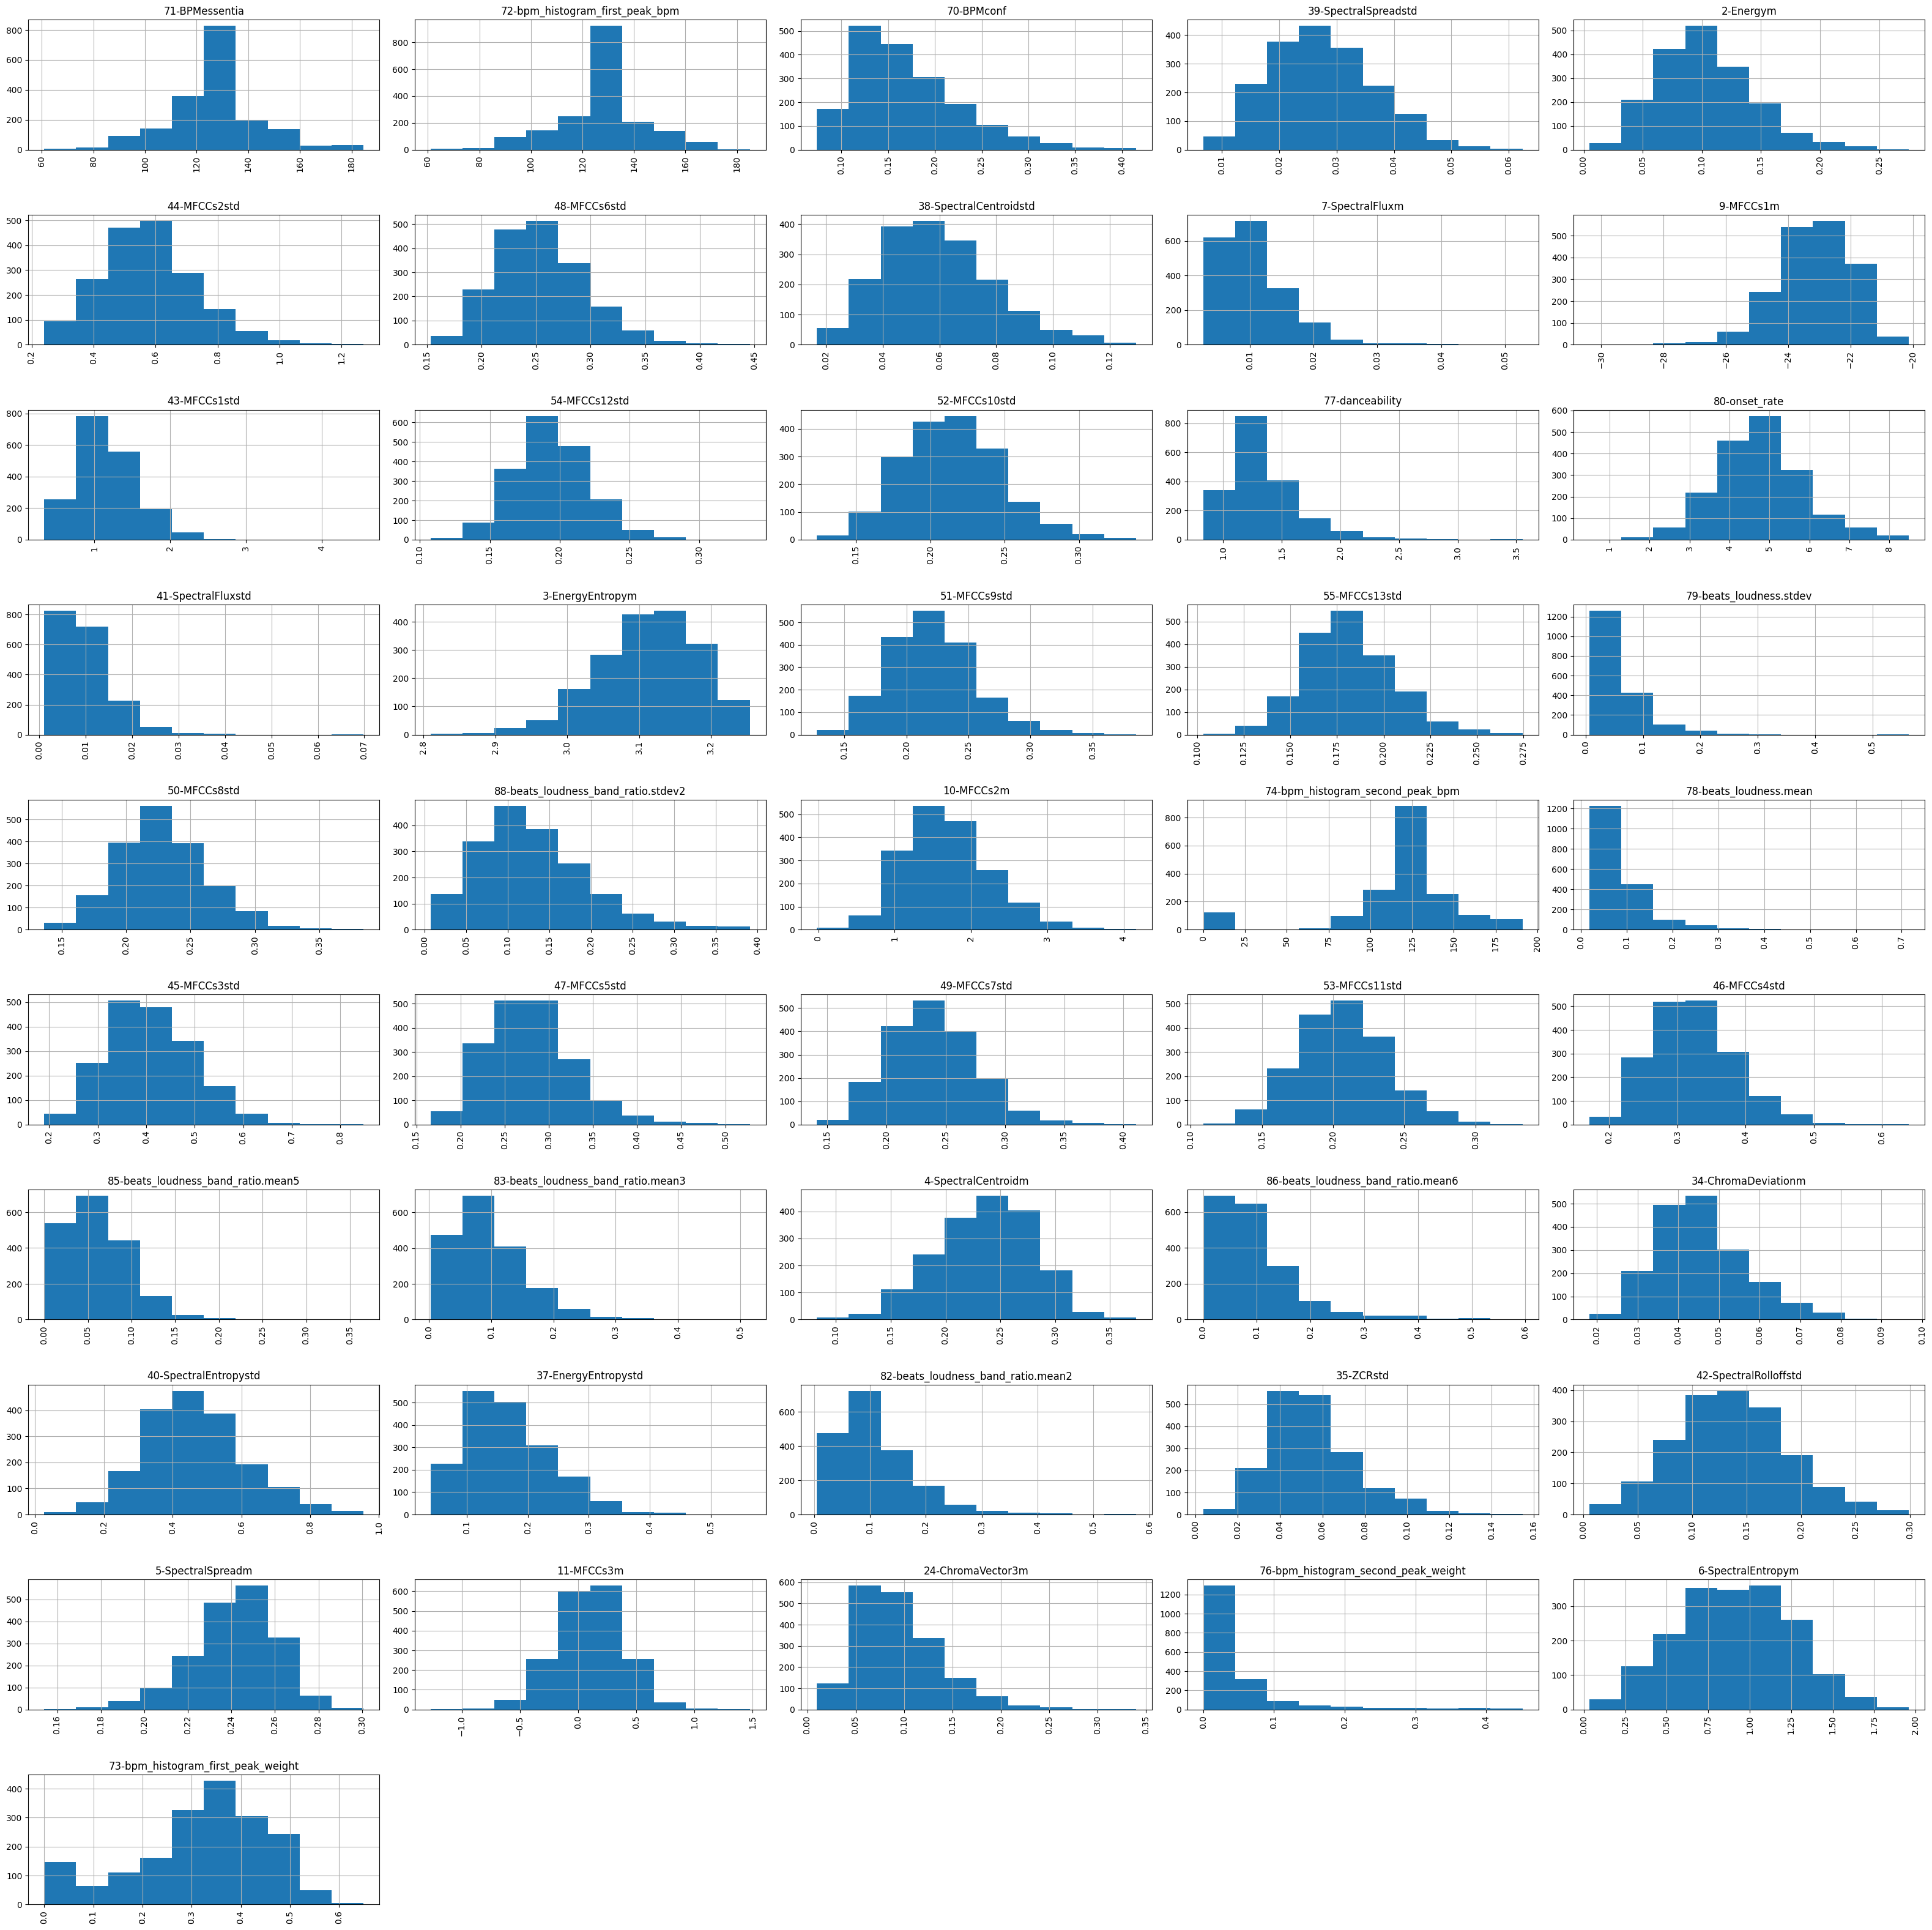

In [79]:
fig = plt.figure(figsize=(40, 40))
cols = 5
rows = int(np.ceil(float(train_set[features_modelo].shape[1]) / cols))
for i, column in enumerate(train_set[features_modelo].columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train_set[features_modelo].dtypes[column] == object:
        train_set[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train_set[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.5, wspace=0.1)

In [40]:
df.describe().T['max'] - df.describe().T['min'] 

1-ZCRm                                 0.229537
2-Energym                              0.276580
3-EnergyEntropym                       0.508248
4-SpectralCentroidm                    0.291076
5-SpectralSpreadm                      0.148927
                                         ...   
88-beats_loudness_band_ratio.stdev2    0.391788
89-beats_loudness_band_ratio.stdev3    0.356659
90-beats_loudness_band_ratio.stdev4    0.412436
91-beats_loudness_band_ratio.stdev5    0.246017
92-beats_loudness_band_ratio.stdev6    0.380114
Length: 92, dtype: float64

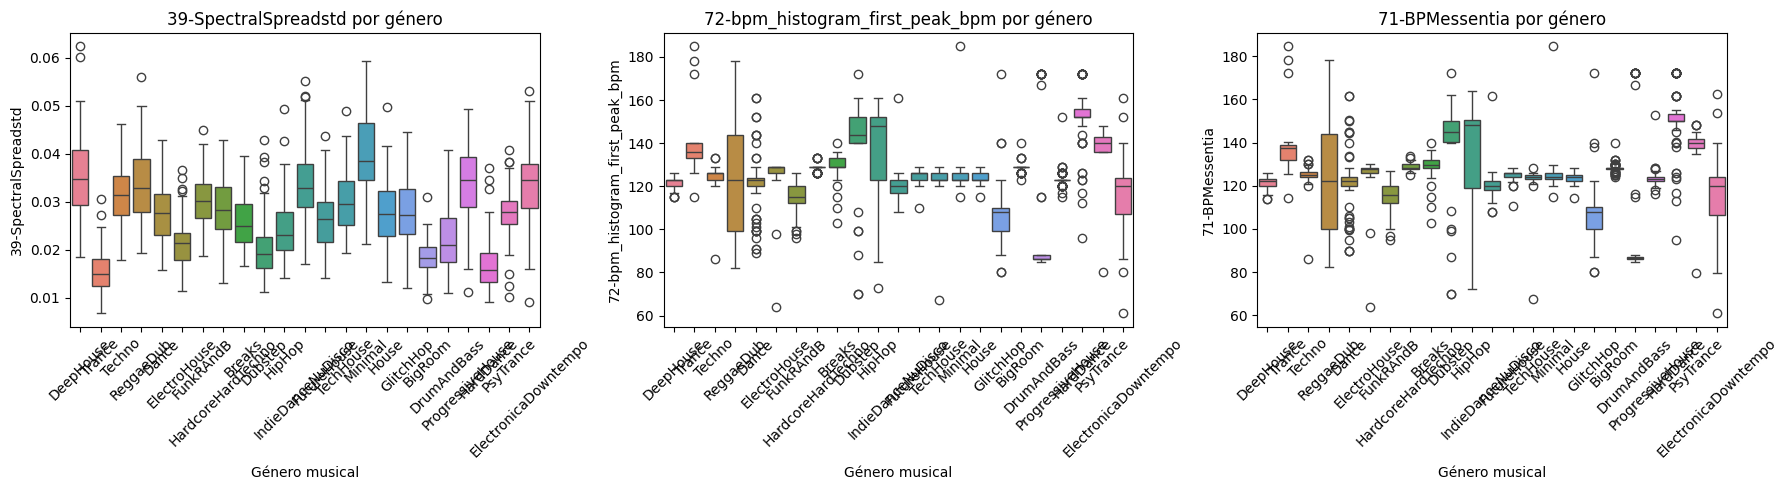

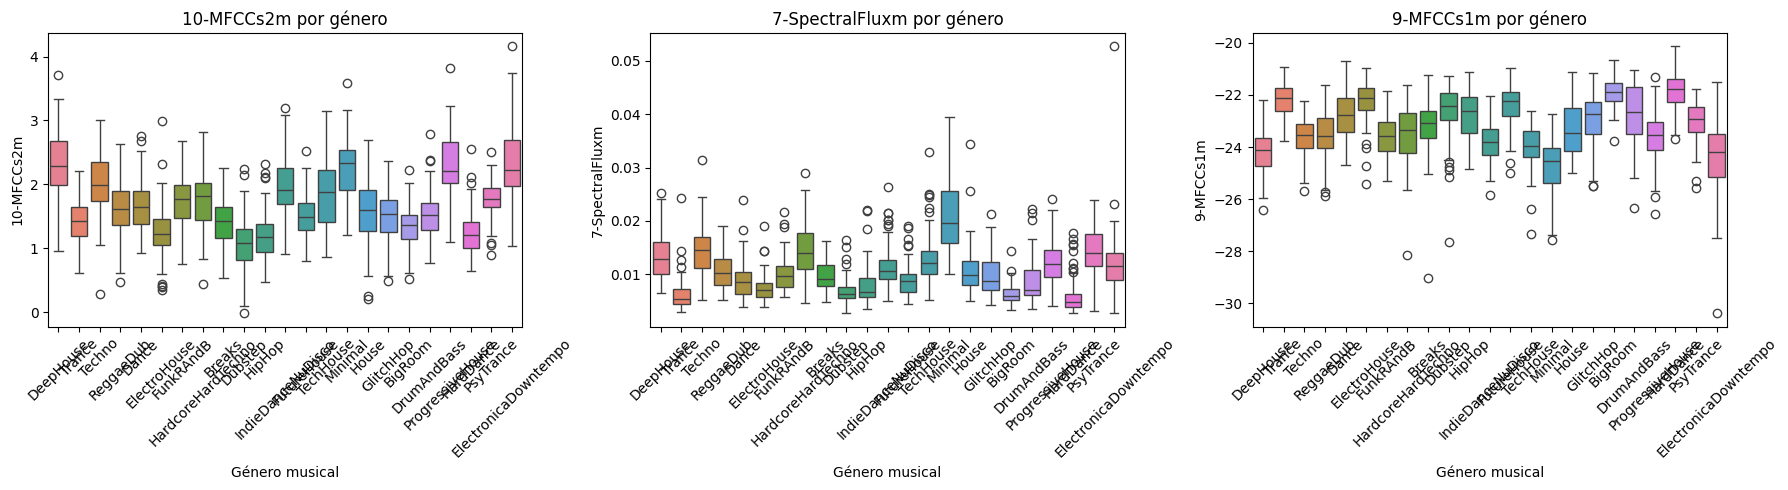

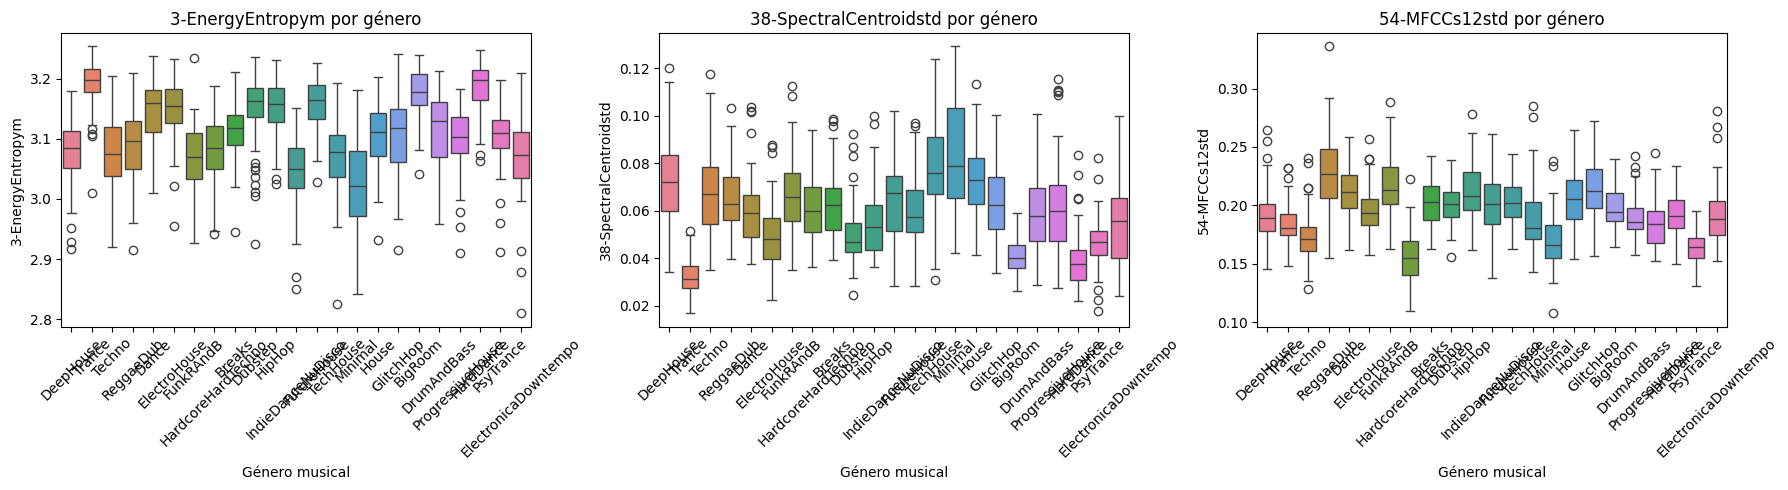

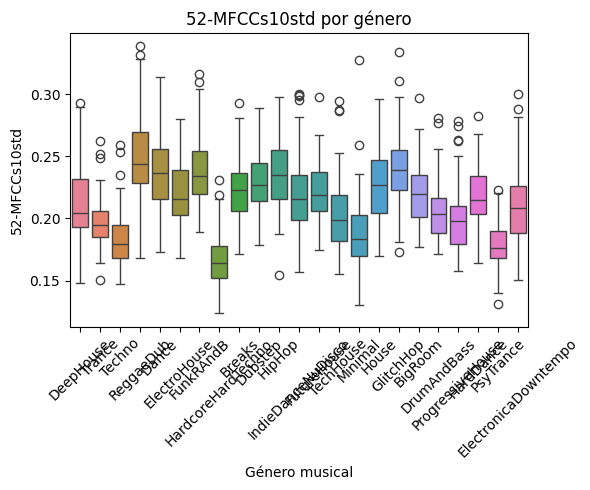

In [102]:

# Dividir en grupos de 3
feature_groups = [selected_variables[i:i + 3] for i in range(0, len(selected_variables), 3)]

# Graficar los boxplots por grupo
for group in feature_groups:
    fig, axes = plt.subplots(1, len(group), figsize=(6 * len(group), 5))
    if len(group) == 1:
        axes = [axes]
    for ax, feature in zip(axes, group):
        sns.boxplot(x=y, y=train_set[feature], ax=ax, hue = y)
        ax.set_title(f'{feature} por género')
        ax.set_xlabel('Género musical')
        ax.set_ylabel(feature)
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()


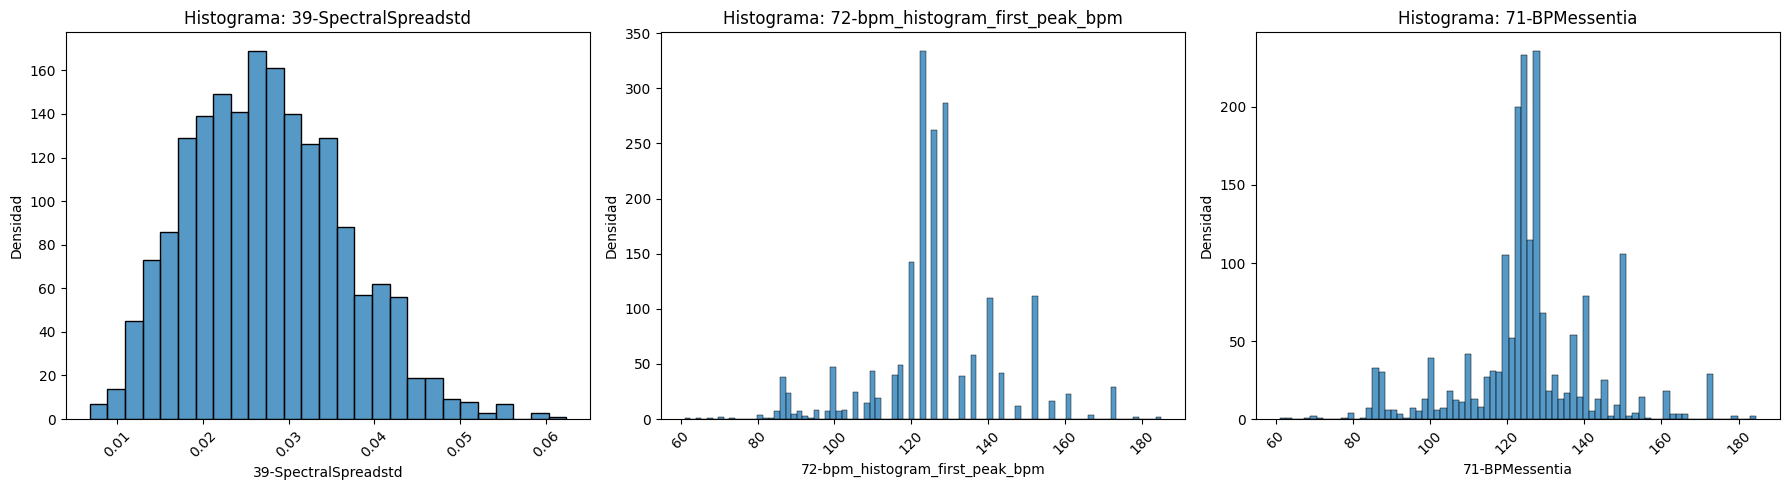

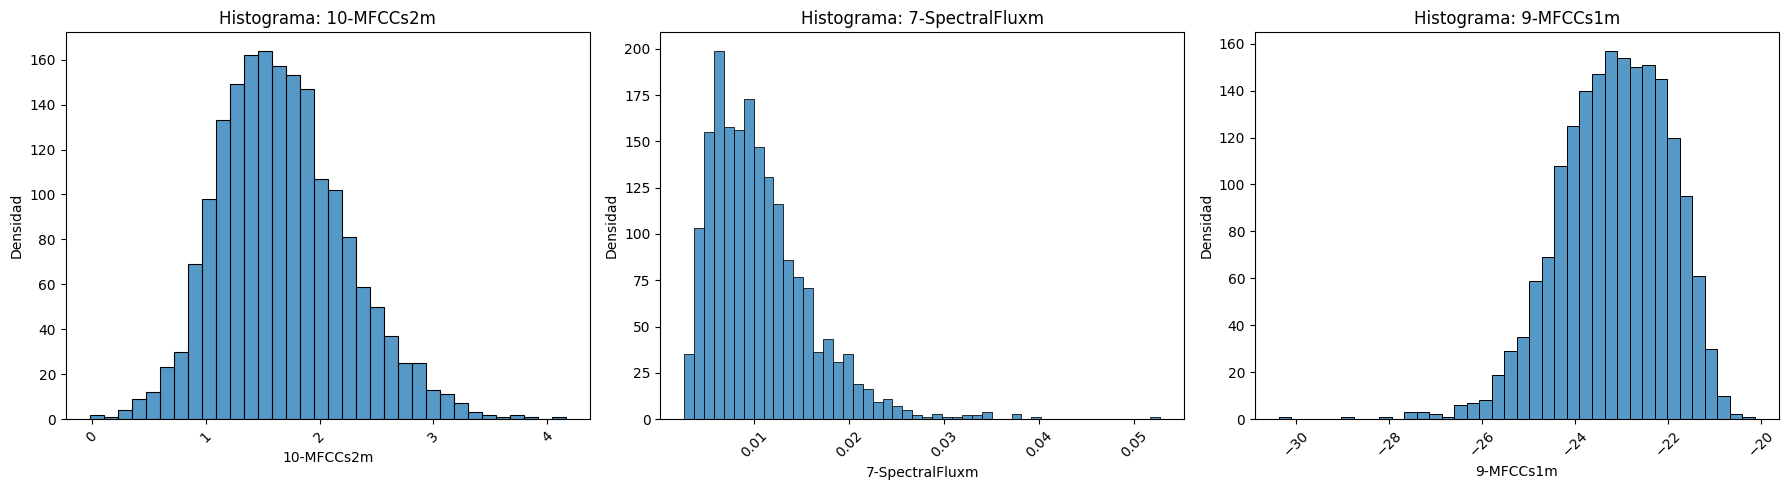

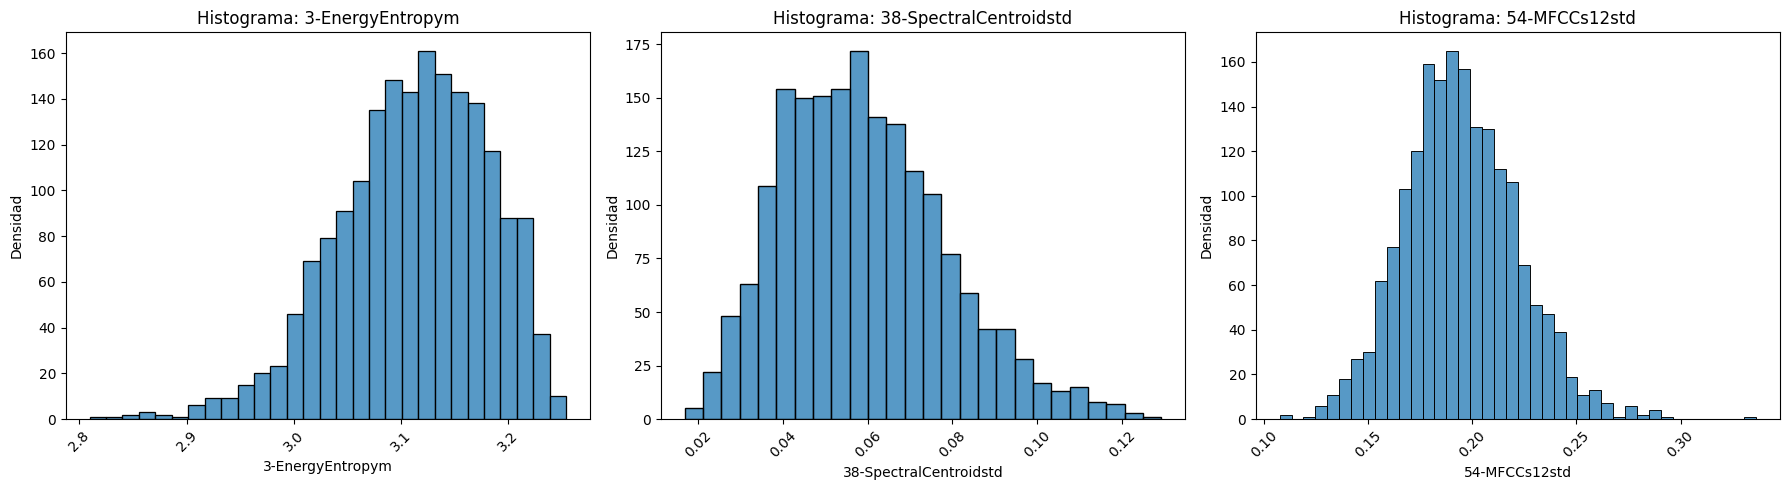

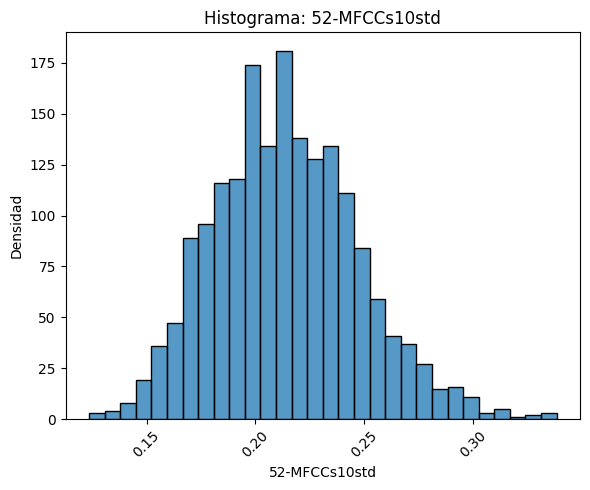

In [103]:
# Dividir las variables en grupos de 3
feature_groups = [selected_variables[i:i + 3] for i in range(0, len(selected_variables), 3)]

# Crear los histogramas
for group in feature_groups:
    fig, axes = plt.subplots(1, len(group), figsize=(6 * len(group), 5))
    if len(group) == 1:
        axes = [axes]
    for ax, feature in zip(axes, group):
        sns.histplot(data=train_set, x=feature, common_norm=False, ax=ax)
        ax.set_title(f'Histograma: {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Densidad')
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

In [104]:
selected_variables

['39-SpectralSpreadstd',
 '72-bpm_histogram_first_peak_bpm',
 '71-BPMessentia',
 '10-MFCCs2m',
 '7-SpectralFluxm',
 '9-MFCCs1m',
 '3-EnergyEntropym',
 '38-SpectralCentroidstd',
 '54-MFCCs12std',
 '52-MFCCs10std']

In [105]:
feat_selec_imp_col=['71-BPMessentia',
 '44-MFCCs2std',
 '2-Energym',
 '39-SpectralSpreadstd',
 '3-EnergyEntropym',
 '9-MFCCs1m',
 '38-SpectralCentroidstd',
 '43-MFCCs1std',
 '52-MFCCs10std',
 '48-MFCCs6std',
 '7-SpectralFluxm',
 '74-bpm_histogram_second_peak_bpm',
 '77-danceability',
 '45-MFCCs3std',
 '10-MFCCs2m',
 '79-beats_loudness.stdev',
 '4-SpectralCentroidm',
 '86-beats_loudness_band_ratio.mean6',
 '88-beats_loudness_band_ratio.stdev2',
 '46-MFCCs4std',
 '81-beats_loudness_band_ratio.mean1',
 '6-SpectralEntropym',
 '80-onset_rate',
 '85-beats_loudness_band_ratio.mean5',
 '24-ChromaVector3m',
 '40-SpectralEntropystd',
 '34-ChromaDeviationm',
 '87-beats_loudness_band_ratio.stdev1',
 '58-ChromaVector3std',
 '36-Energystd']

In [106]:
features_altas_expectativas = ['1-ZCRm',
 '2-Energym',
 '3-EnergyEntropym',
 '4-SpectralCentroidm',
 '5-SpectralSpreadm',
 '6-SpectralEntropym',
 '7-SpectralFluxm',
 '8-SpectralRolloffm',
 '9-MFCCs1m',
 '22-ChromaVector1m',
 '43-MFCCs1std',
 '56-ChromaVector1std',
 '69-BPM',
 '70-BPMconf',
 '71-BPMessentia',
 '77-danceability']

In [112]:
features_all = train_set.columns.to_list()

In [114]:
X_train_dict = {}
X_test_dict = {}

features_set_name = ["anova","feat_imp","altas_exp", "todas"]

for set_name,feature_list in zip(features_set_name, [selected_variables,feat_selec_imp_col,features_altas_expectativas,features_all]):
    # Recuerda que features_num ya contiene features_num_2 por eso la usamos al final, para considerar todas las features
    X_train_dict[set_name] = train_set[feature_list]
    X_test_dict[set_name] = test_set[feature_list]


In [116]:
rf_clf = RandomForestClassifier(max_depth= 6, random_state= 42)
lgb_clf = LGBMClassifier(max_depth= 6, random_sate = 42, verbose = -100)
xgb_clf = XGBClassifier(max_depth = 6, random_state = 42)


modelos = {
    "Random Forest": rf_clf,
    "Lightgbm": lgb_clf,
    "XGBoost": xgb_clf
}

In [119]:
X_train.shape


(1840, 10)

In [121]:
y_train.shape

(1472,)

In [ ]:
# Para scoring precision
scoring_func = make_scorer(precision_score, pos_label=1, average='macro')
for feature_set, X_train_full in X_train_dict.items():
    print(f"Para el set {feature_set}:")
    for tipo, modelo in modelos.items():
        print(f"{tipo}: ", end=" ")
        if tipo != "Regresion Logistica":
            # Usar y_encoded para el train_set completo
            print(np.mean(cross_val_score(modelo, X_train_full, y_encoded, cv=5, scoring=scoring_func)))
    print("******")


In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=train_set,
    x='new_target',
    y='77-danceability',
    order=train_set.groupby('new_target')['77-danceability'].median().sort_values(ascending=False).index,
    palette='Set3'
)
plt.title("Distribución de '77-danceability' por género (ordenado por mediana)")
plt.xlabel('Género')
plt.ylabel('Danceability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'new_target'

<Figure size 1200x600 with 0 Axes>